In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from dct import create_dct_basis
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-w9nd5djy because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Image Compression

We can also apply the DCT to compress images as well.  Here we have an $8 \times 8$ image that we will attempt to compress with DCT.  Note that the pixel values range from $\left[0, 1\right]$, but we have colored it blue and orange for added emphasis.

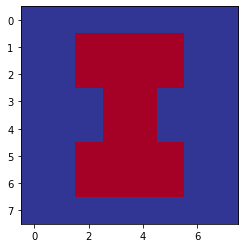

In [2]:
N = 8
block_i = np.ones((N, N))
block_i[1:-1, 3:5] = 0
block_i[1:3, 2:6] = 0
block_i[-3:-1, 2:6] = 0
plt.imshow(block_i, cmap="RdYlBu")

In [3]:
D = create_dct_basis(N)

How can we actually transform into the DCT basis here?  If we imagine the matrix `block_i` above as a linear transformation from and to the standard basis:
$$ {\bf I}_{\mathcal{E}, \mathcal{E}} $$
We can write the equivalent transformation from and to the DCT basis as:
$$ {\bf I}_{\mathcal{D}, \mathcal{D}} = {\bf D}^T {\bf I}_{\mathcal{E}, \mathcal{E}} {\bf D} $$

**Check your answers!**

Using this, convert the matrix `block_i` into the DCT frequency space and save as `freq_i`.

In [4]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
freq_i = np.transpose(D) @ block_i @ D

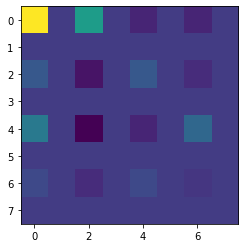

In [5]:
plt.imshow(freq_i)

Now that we have converted into the frequency space, "compress" `freq_i` by looping through the entries and removing any with an absolute value less than `tol = 0.50`.

**Check your answers!**

Save your compressed result in the variable `comp_freq` (remember to not override the values in `freq_i`!). Count the number of entries removed and store it as `removed_elems`. 

In [6]:
tol = 0.5

In [7]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
#removed_elems = 0
comp_freq = freq_i.copy()
print(comp_freq)
i,j = comp_freq.shape
removed_elems = 0
for a in range(i): 
    for b in range(j):
        if((comp_freq[a][b] < tol) and (comp_freq[a][b] > -tol)):
            comp_freq[a][b] = 0
            removed_elems += 1
  #  if np.abs(comp_freq[i]) < tol:
     #   comp_freq[i] = 0
     #   removed_elems += 1
#comp_freq = np.where(np.abs(comp_freq) < tol, 0, comp_freq)
#removed_elems = np.count_nonzero(comp_freq==0)

Print this value to get an idea of the rate of compression here.

In [8]:
print(f"removed {removed_elems} / {8 ** 2} entries")

removed 55 / 64 entries


**Check your answers!**

Convert `comp_freq` back into the standard basis, and save your result as `comp_i`.

In [9]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
comp_i = la.inv(D.T) @ comp_freq @ la.inv(D)

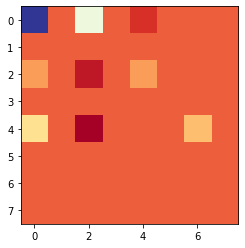

In [10]:
plt.imshow(comp_i, cmap="RdYlBu")

### Compressing Alma

This sort of image compression can be scaled up to much larger images than $8 \times 8$ using the "sectioning" or "chunking" technique discussed earlier for audio compression.  We can break an image apart into $8 \times 8$ chunks and then perform DCT compression on those.  This is in fact how the JPEG standard works.

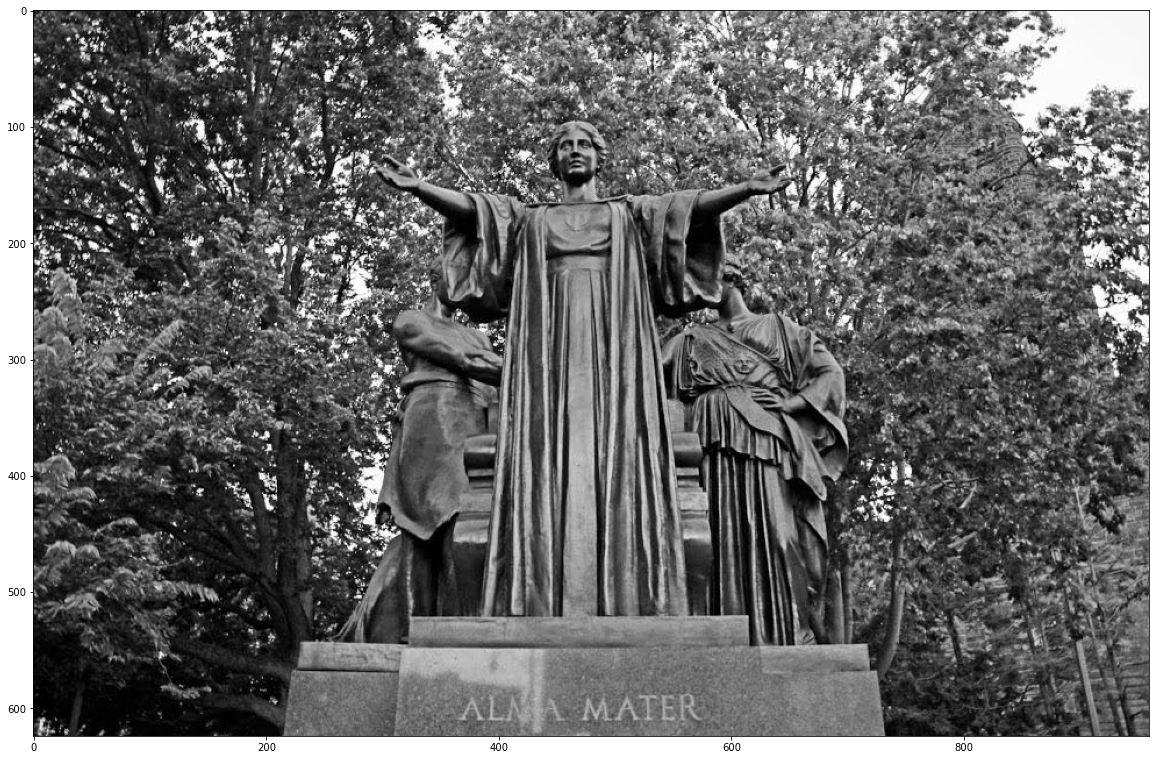

In [11]:
alma = plt.imread("alma.jpg")[:624,:,0]
plt.figure(figsize=(20,20))
plt.imshow(alma, cmap="gray")

Note that all pixel values of the image are integers between 0 and 255:

In [12]:
alma.max()

255

In [13]:
alma.min()

0

In [14]:
alma.shape

(624, 960)

First we create the DCT basis for the chunks:

In [15]:
N = 8
D2 = create_dct_basis(N)

**Check your answers!**

We provide you with the following starter code. For each `chunk`:

- Convert it to the DCT basis.


- "Drop" the frequencies with smaller contribution. Here we will set to zero all entries such that the absolute value is smaller than a tolerance `tol`. The tolerance for each chunk will be computed as 10% of the largest value of the chunk (in magnitude from the DCT basis representation).


- Convert it back to standard basis.


- Store the final "compressed" image as `alma_comp`.


- After the DCT transformations, you may find that the image values no longer lie between `0` and `255`. Use [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) to correct the values back into that range.

In [16]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
alma_comp = np.zeros_like(alma)

for u in range(0, alma.shape[0], N):
    for v in range(0, alma.shape[1], N):
        # Get get subimages of the alma image, and store them as chunk
        chunk = alma[u:u+N, v:v+N].copy() 
        
        # Convert to DCT basis
        chunk_dct = D2.T @ chunk @ D2 #CHANGE THIS
        
        # Get the tolerance
        tol = np.abs(chunk_dct).max() * 0.1 #CHANGE THIS
        
        # Change to zero all the entries with value smaller than the tolerance
        chunk_dct[np.abs(chunk_dct) < tol] = 0 #every element of chunk_dct that meets the criteria in the brakets is replaced with zero
        
        # Convert back to standard basis
        chunk_comp = D2 @ chunk_dct @ D2.T #CHANGE THIS
        
        # Store result as alma_comp
        alma_comp[u:u+N, v:v+N] = np.clip(chunk_comp.copy(), 0, 255)


Plot your image.  How does it compare to the original Alma image above?

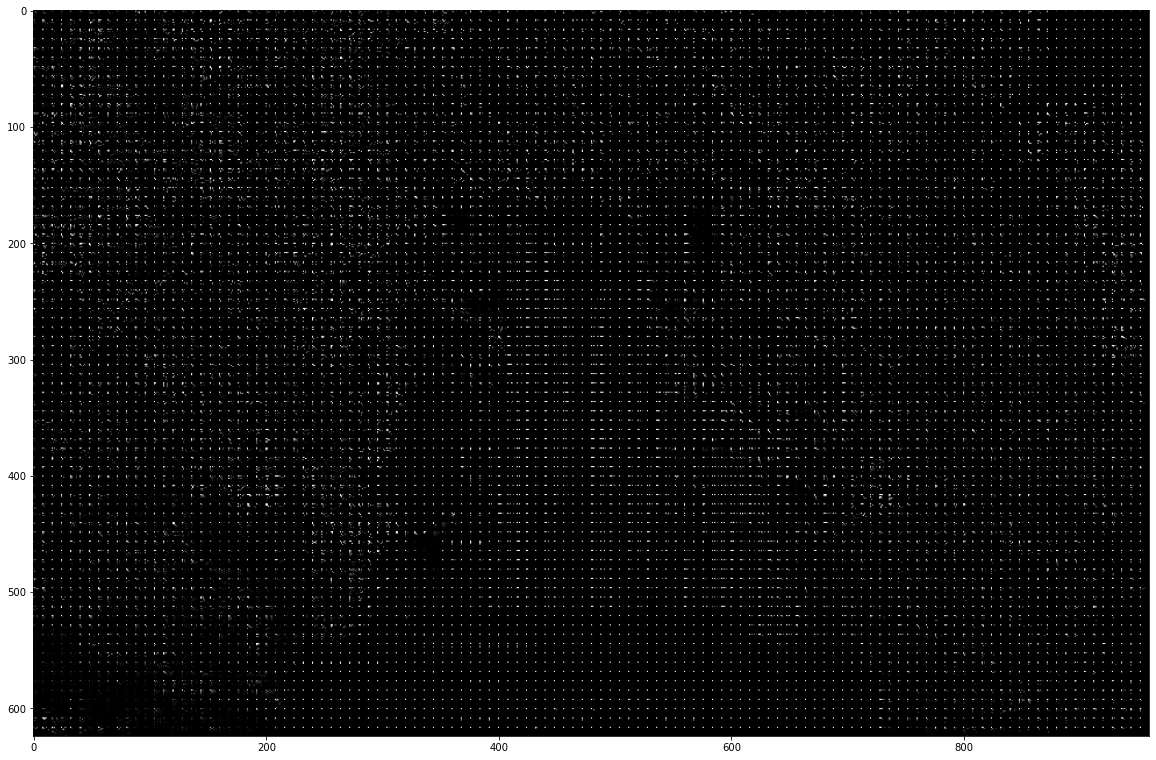

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(alma_comp, cmap="gray")